In [2]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

<h1>ONLY NEED CODE FROM HERE DOWN</h1>

In [10]:
append_owid = pd.read_csv("final_append.csv")
append_owid = append_owid.drop(["Unnamed: 0", "Unnamed: 0.1", "index", "iso_code"], axis=1)

In [11]:
final = pd.read_csv("final_w_rd.csv")
final = final.set_index(final['Unnamed: 0'])
final.index.name=None
final = final.drop(['Unnamed: 0', 'Africa_ghg.1'], axis=1)

<h3>Does a reduction in fossil fuels consumption correlate to a reduction in GHG</h3>

In [87]:
fossil_vs_ghg = final

def calc_fossil_vs_ghg(country):
    temp = fossil_vs_ghg[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'ghg_{country}'] = fossil_vs_ghg[[f"{country}_ghg"]]
    nancount = 0
    for i in range(temp.shape[1]):
        if(temp.iat[i, 3] == 0 or temp.iat[i, 4]==0):
            nancount += 1
            
    if nancount >= 4:
        return;
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'ghg_{country}')
    

In [85]:
calc_fossil_vs_ghg("Zimbabwe")

      gas_production_Zimbabwe  oil_production_Zimbabwe  \
2000                      NaN                      NaN   
2001                      NaN                      NaN   
2002                      NaN                      NaN   
2003                      NaN                      NaN   
2004                      NaN                      NaN   
2005                      NaN                      NaN   
2006                      NaN                      NaN   
2007                      NaN                      NaN   
2008                      NaN                      NaN   
2009                      NaN                      NaN   
2010                      NaN                      NaN   
2011                      NaN                      NaN   
2012                      NaN                      NaN   
2013                      NaN                      NaN   
2014                      NaN                      NaN   
2015                      NaN                      NaN   
2016          

<h3>Is the reduction in fossil fuel consumption related to a decrease in fossil fuel production</h3>

In [1038]:
c_vs_p = final

def graph_C_vs_P(country):
    temp = c_vs_p[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'fossil_consumption_{country}'] = c_vs_p[[f"fossil_fuel_consumption_{country}"]]
    temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'fossil_consumption_{country}')

<AxesSubplot:xlabel='fossil_production', ylabel='fossil_fuel_consumption'>

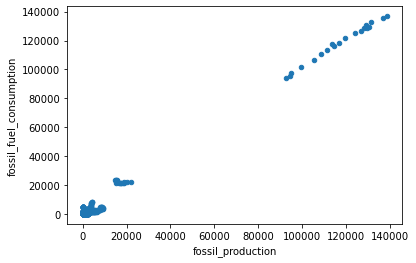

In [1107]:
#all data
temp = append_owid[[f"gas_production", f"oil_production", f"coal_production"]]
append_owid[f'fossil_production'] = temp.sum(axis=1)
append_owid.plot(kind="scatter", x="fossil_production", y="fossil_fuel_consumption")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


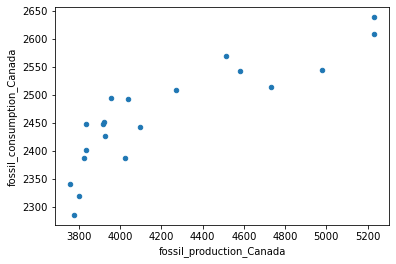

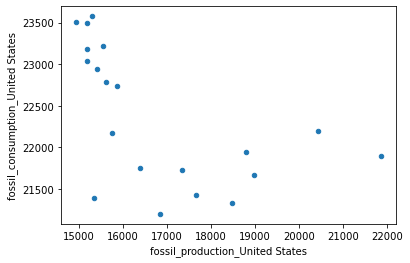

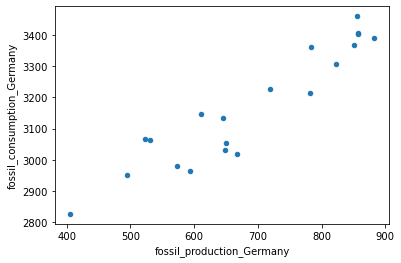

In [1040]:
graph_C_vs_P("Canada")
graph_C_vs_P("United States")
graph_C_vs_P("Germany")

<h3>Is fossil fuel production reduction correlated with clean energy production or consumption</h3>

In [1109]:
fossilP_vs_cleanP = final

def graphFossilP(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp = temp.sum(axis=1)
    temp.plot()
    return temp

def graphFossilP_vs_cleanP(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_production_{country}'] = fossilP_vs_cleanP[[f"renewables_electricity_{country}"]]
    temp.plot(kind="scatter", x=f'clean_production_{country}', y=f"fossil_production_{country}")
    return temp

def graphFossilP_vs_cleanC(country):
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)
    temp[f'clean_consumption_{country}'] = fossilP_vs_cleanP[[f"renewables_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'clean_consumption_{country}', y=f"fossil_production_{country}")
    return temp

#which clean energy helps reduce fossil fuel consumption
def graphFossilP_vs_C(energy, country, ending):
    if ending:
        ending = f"_{country}"
    else:
        ending = ""
    temp = fossilP_vs_cleanP[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production{ending}'] = temp.sum(axis=1)
    temp[f'fossil_production{ending}'] = temp[f'fossil_production{ending}']
    temp[f'{energy}_consumption{ending}'] = fossilP_vs_cleanP[[f"{energy}_consumption_{country}"]]
    temp.plot(kind="scatter", x=f'{energy}_consumption{ending}', y=f"fossil_production{ending}")
    return temp

2000    15551.774
2001    15875.011
2002    15411.246
2003    15191.157
2004    15171.294
2005    14937.278
2006    15176.292
2007    15300.806
2008    15610.463
2009    15341.847
2010    15755.518
2011    16378.394
2012    16834.523
2013    17332.688
2014    18784.113
2015    18983.209
2016    17654.666
2017    18475.977
2018    20434.432
2019    21851.511
dtype: float64

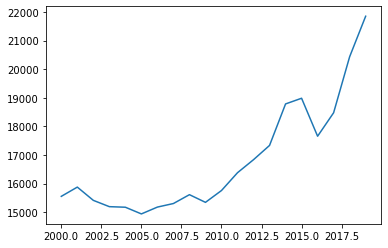

In [886]:
graphFossilP("United States")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<AxesSubplot:xlabel='renewables_consumption', ylabel='fossil_production'>

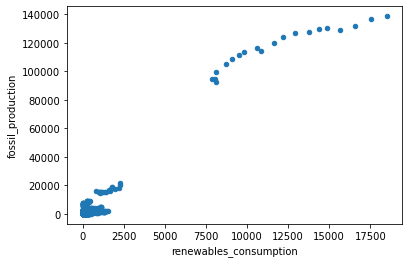

In [1110]:
#all data
energy = "renewables"
temp = append_owid[[f"{energy}_consumption"]]
temp["fossil_production"] = append_owid["fossil_production"]
temp["fossil_consumption"] = append_owid["fossil_fuel_consumption"]
temp.plot(kind="scatter", x=f"{energy}_consumption", y="fossil_production")

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

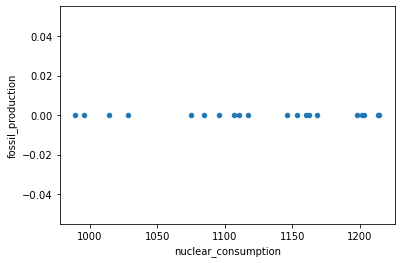

In [940]:
# graphFossilP_vs_cleanC("Canada")
# graphFossilP_vs_cleanC("United States")
# graphFossilP_vs_cleanC("China")
x = graphFossilP_vs_C("nuclear", "France", False)

In [ ]:
for i in df.columns:
    df[i] = df[i].astype(float)

df.index = df.index.astype(int)

/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/adamomarali/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


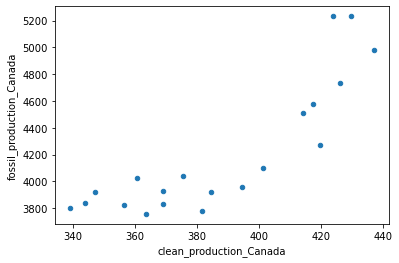

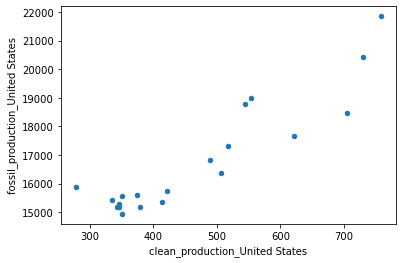

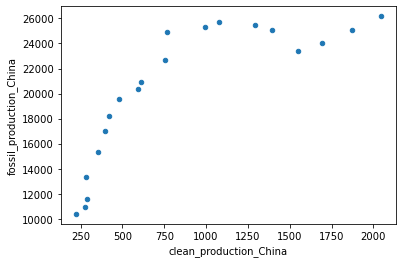

In [869]:
graphFossilP_vs_cleanP("Canada")
graphFossilP_vs_cleanP("United States")
graphFossilP_vs_cleanP("China")

<h3>Is clean energy production or consumption correlated with investment into R&D</h3>

<AxesSubplot:xlabel='rd', ylabel='renewables_electricity'>

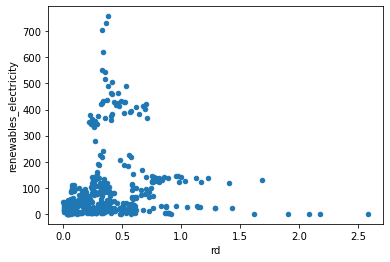

In [1152]:
temp = append_owid
temp = temp.dropna(subset=['rd'])
temp = temp[temp.rd != 0]
temp.plot(kind="scatter", x="rd", y="renewables_electricity")

<h3>Production to Consumption Ratio</h3>

In [ ]:
ratio = final

non_clean_energy = ["coal", "oil", "gas", "fossil"]
def p_vs_c_ratio(energy, country):
    if(energy in non_clean_energy):
        if(energy == "fossil"):
            temp = ratio[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
            temp[f'fossil_production_{country}'] = temp.sum(axis=1)
            temp[f'{energy}_consumption_{country}'] = ratio[[f"fossil_fuel_consumption_{country}"]]
            temp.plot(kind="scatter", x=f"fossil_production_{country}", y=f'{energy}_consumption_{country}')
        else:
            temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_production_{country}"]]
            temp.plot(kind="scatter", x=f"{energy}_production_{country}", y=f'{energy}_consumption_{country}')
    else:
        temp = ratio[[f"{energy}_consumption_{country}", f"{energy}_electricity_{country}"]]
        temp.plot(kind="scatter", x=f"{energy}_electricity_{country}", y=f'{energy}_consumption_{country}')



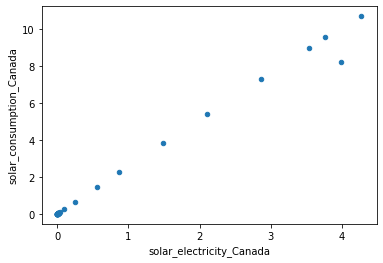

In [875]:
p_vs_c_ratio("solar", "Canada")

<h3>What renewable energy reduces fossil fuel production the most</h3>

In [ ]:
file = final

def intensityC_vs_fossilP(energy, country):
    #fossil fuel production
    temp = file[[f"gas_production_{country}", f"oil_production_{country}", f"coal_production_{country}"]]
    temp[f'fossil_production_{country}'] = temp.sum(axis=1)

    #energy intensity
    temp
    

In [1154]:
append_owid

,Unnamed: 0,index,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,...,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,rd,fossil_production
0,0,220,NaN,Africa,2000,-0.087,-1.320,11.037,134.287,7.284,...,NaN,0.040,788.889,0.015,0.434,0.489,0.217,0.603,NaN,7183.558
1,1,221,NaN,Africa,2001,-0.248,-3.761,3.363,45.431,-1.002,...,NaN,0.091,134.874,0.035,0.659,1.148,0.501,1.382,NaN,7181.984
2,2,222,NaN,Africa,2002,-1.673,-25.333,4.557,63.640,0.679,...,NaN,0.092,6.161,0.036,0.071,1.219,0.522,1.432,NaN,7249.277
3,3,223,NaN,Africa,2003,7.458,111.037,7.425,108.417,8.758,...,NaN,0.107,20.951,0.042,0.255,1.474,0.620,1.690,NaN,7845.340
4,4,224,NaN,Africa,2004,2.181,34.898,4.627,72.579,11.272,...,NaN,0.144,41.238,0.055,0.608,2.082,0.861,2.330,NaN,8479.991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,2555,17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,...,2.503057e+10,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,32.517
2556,2556,17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,...,2.515176e+10,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,20.260
2557,2557,17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,21.957
2558,2558,17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,26.910


# Getting available countries

In [73]:
clone = final
avail = []
owidSet = {"Afghanistan"}
ghgSet = {"Afghanistan"}
owid2 = pd.read_csv("Macro/owid-energy-data.csv")

def owidList():
    for i in range(owid2.shape[0]):
        owidSet.add(owid2.iat[i, 1])

        
def ghgList():
    toRemove = []
    for c in owidSet:
        try:
            subset = final[f"{c}_ghg"]
        except KeyError:
            toRemove.append(c)
            
    
    for c in owidSet:
        if c not in toRemove:
            avail.append(c)
    
    avail.sort()
    
    

In [74]:
owidList()
ghgList()
print(avail)

['Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Niger

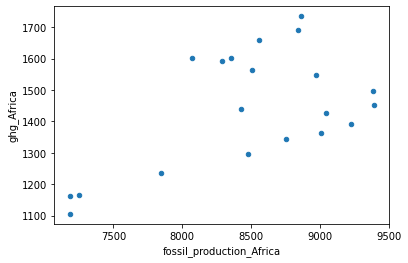

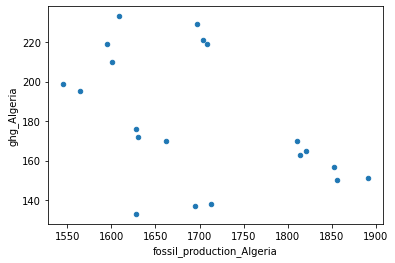

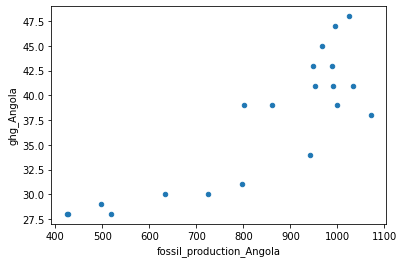

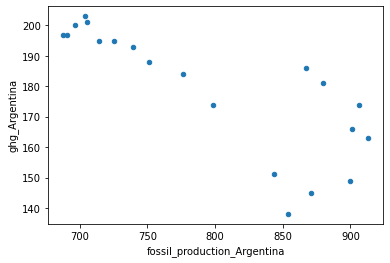

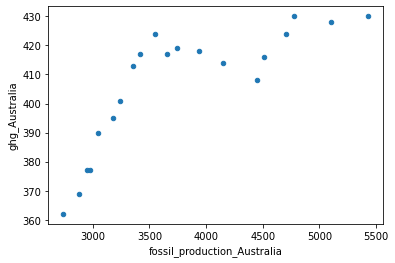

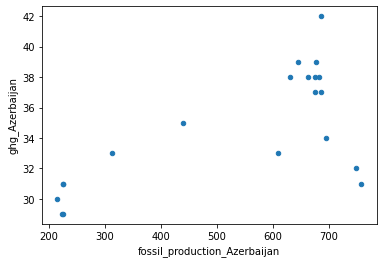

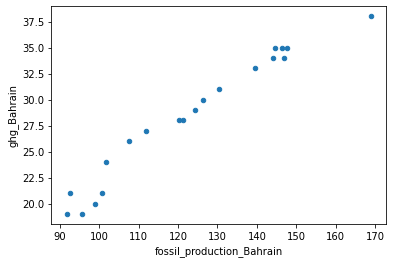

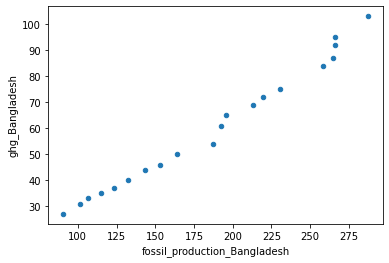

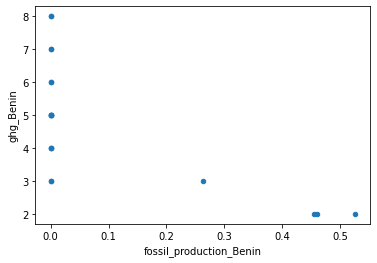

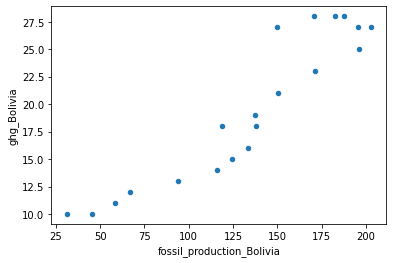

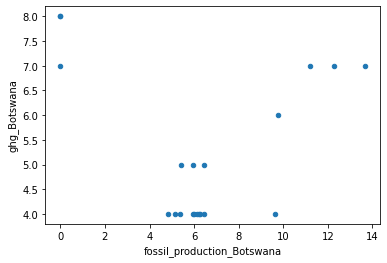

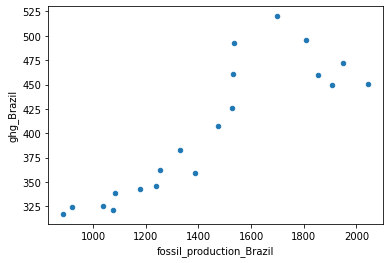

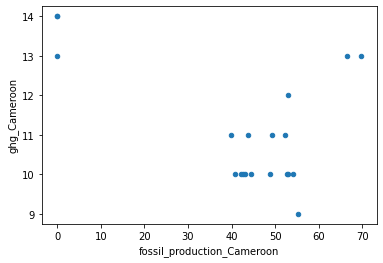

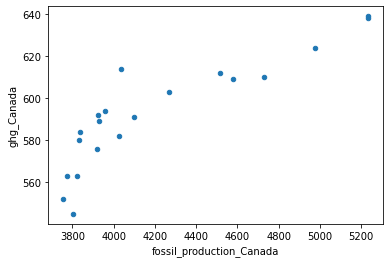

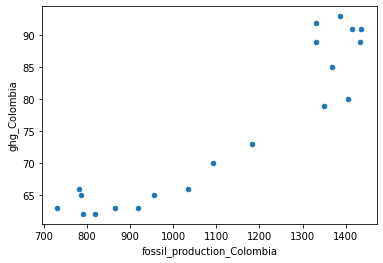

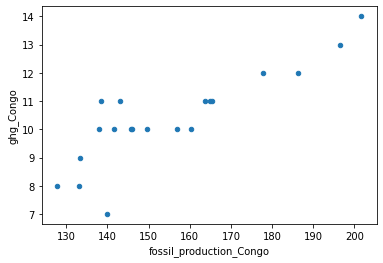

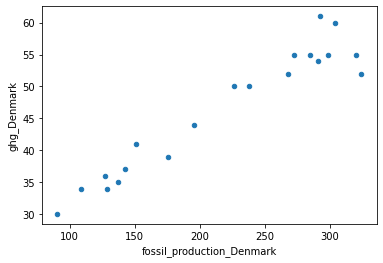

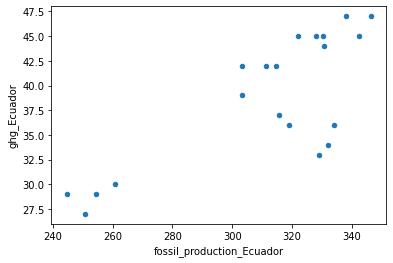

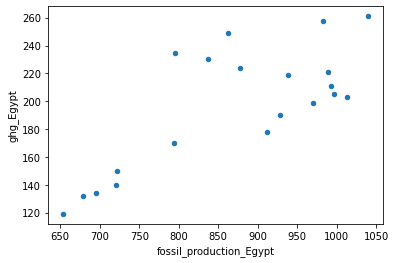

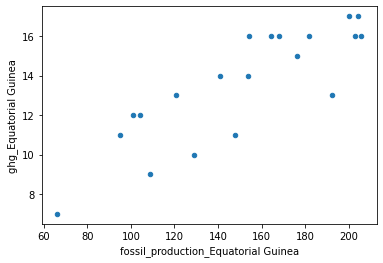

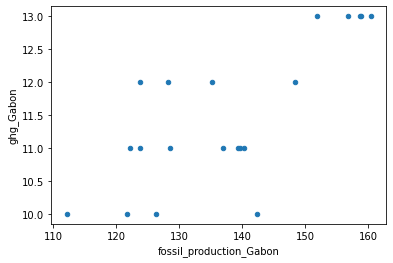

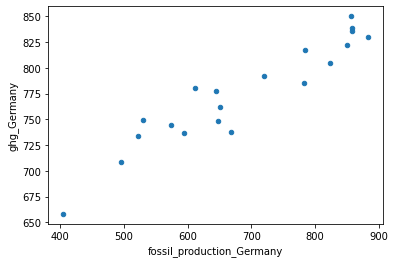

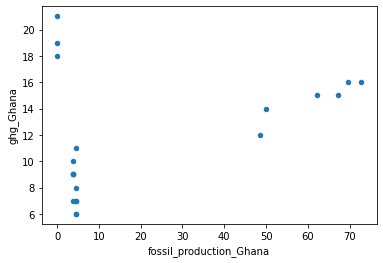

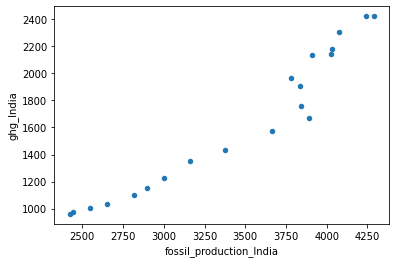

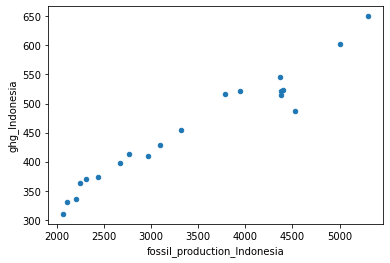

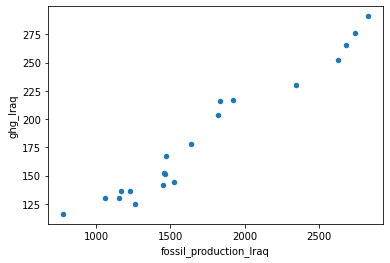

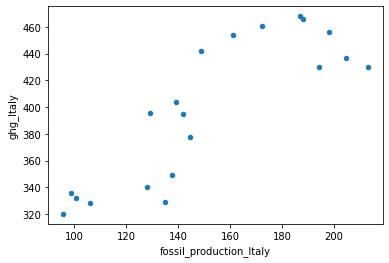

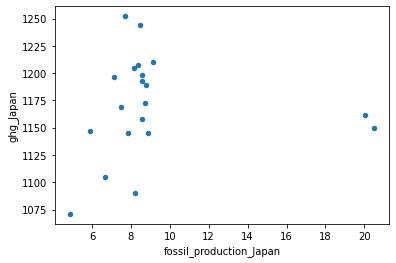

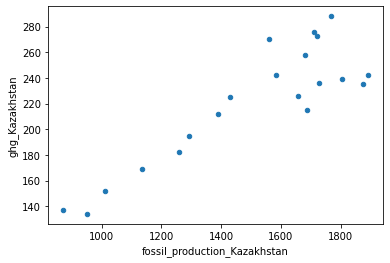

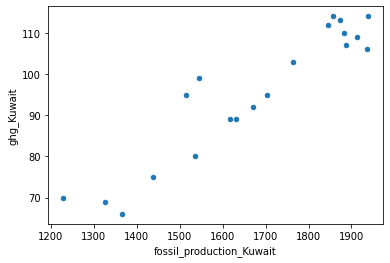

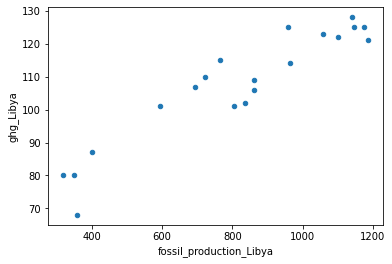

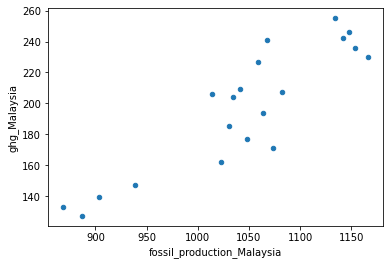

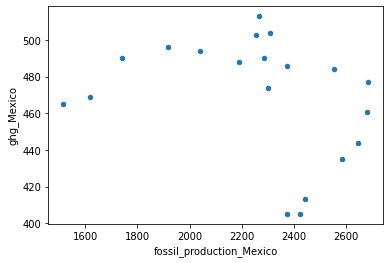

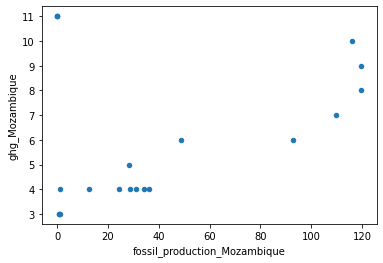

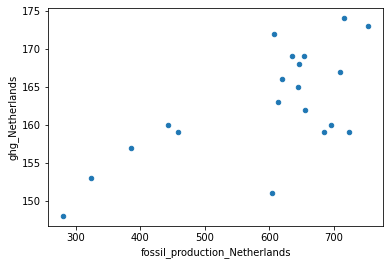

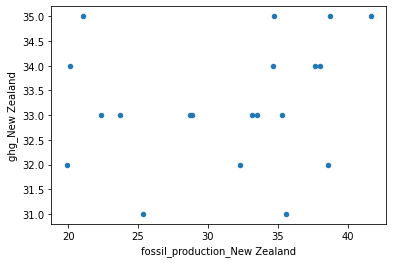

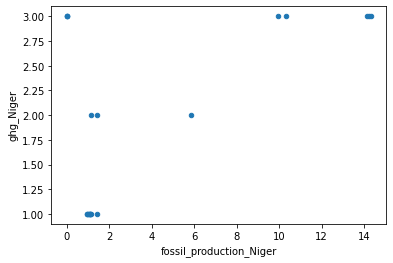

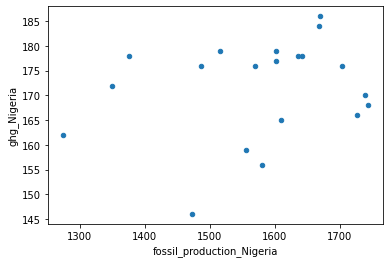

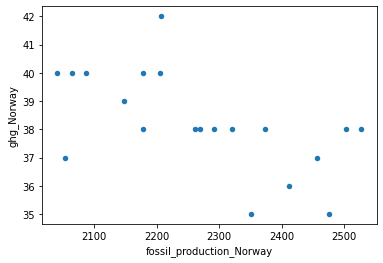

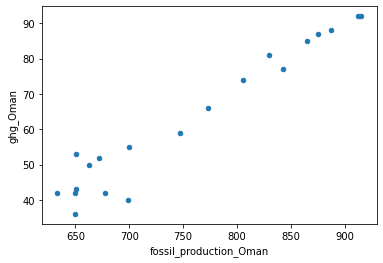

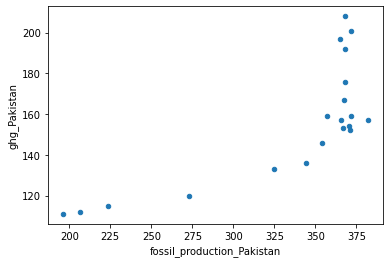

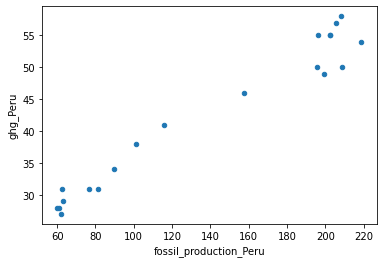

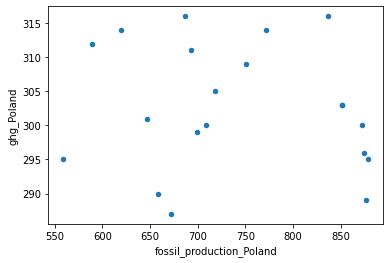

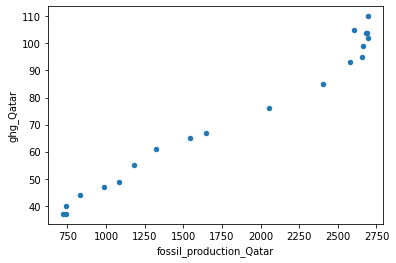

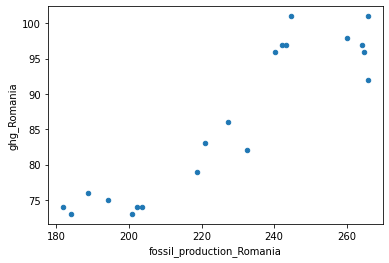

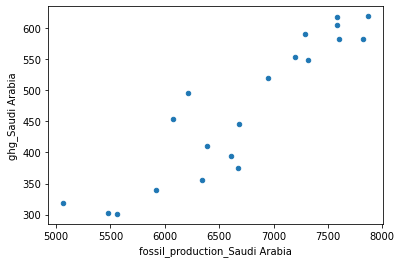

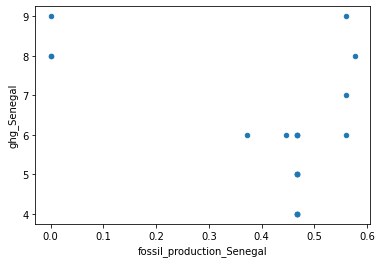

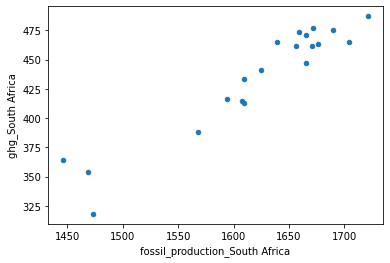

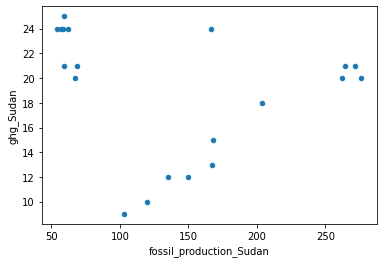

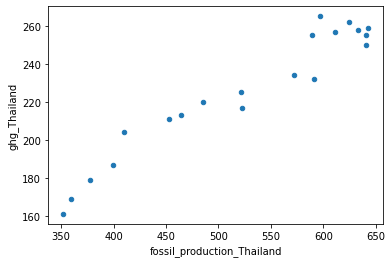

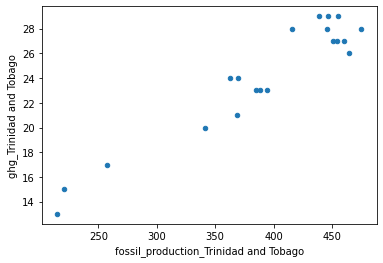

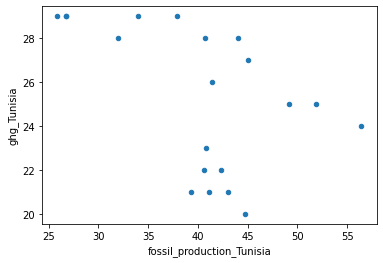

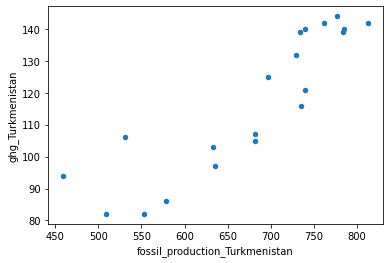

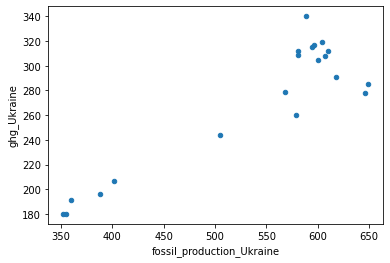

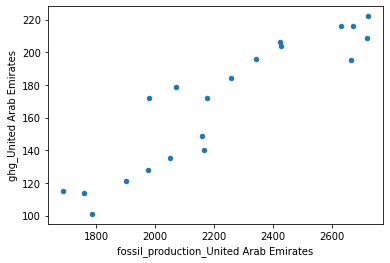

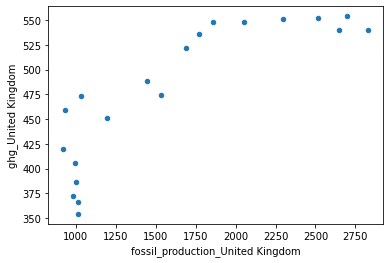

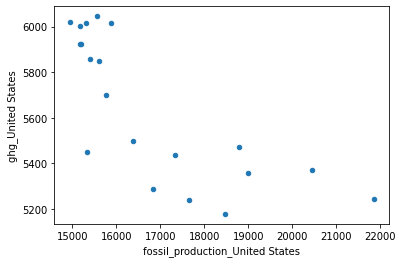

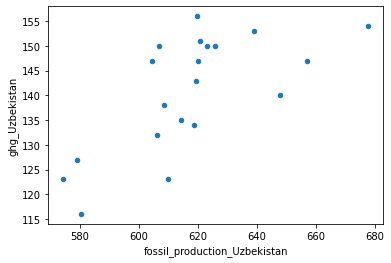

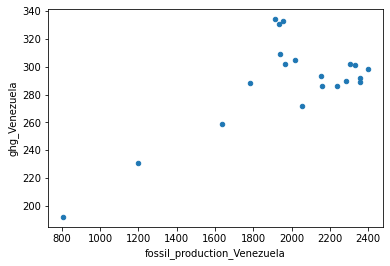

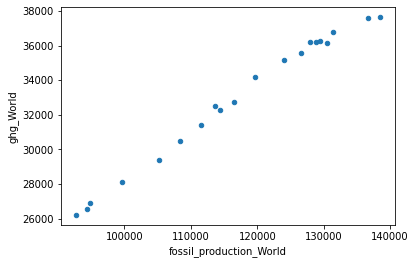

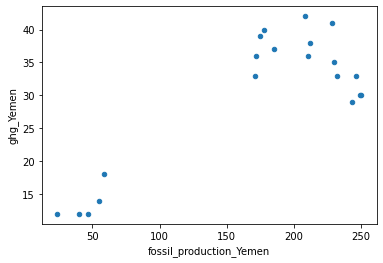

In [88]:
import warnings
warnings.filterwarnings('ignore')

for country in avail:
    calc_fossil_vs_ghg(country)